<center>

# Unsupervised Learning: Clustering and Dimensionality Reduction



# **Part 1 :Song Clustering with K‑Means**

In this part we will perform unsupervised clustering of
Spotify track features using the classic **K‑Means** algorithm.

We will follow the following steps:
1. Load and inspect the Spotify Features dataset.  
2. Drop purely metadata columns that should not influence clustering.  
3. Standardise numeric features (K‑Means is distance‑based).  
4. Use the **Elbow** and **Silhouette** methods to choose an appropriate *K*.  
5. Train a final K‑Means model and attach cluster labels.  
6. Visualise clusters in 2‑D via **PCA**.  




# **Step 1 : Import Libraries**


In [10]:
# You are not allowed import any additional libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# **Step 2 : Load & Clean the Dataset** 

We'll the `SpotifyFeatures.csv` dataset into a DataFrame.

In this step, our goal is to:
- Load the dataset
- Check for any **null values**
- Fill or drop null values as appropriate


In [ ]:
# Step 2: Load the dataset over here

df = pd.read_csv("SpotifyFeatures.csv")
print("Null values in each column:\n", df.isnull().sum())
df = df.dropna()
df.head()


Null values in each column:
 genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


# Feature Selection 



- `genre` (e.g., "Pop", "Jazz", "Hip-Hop")  
- `key` (e.g., "C#", "D", "G")  
- `time_signature` (e.g., "3/4", "4/4")  
- `mode` (e.g., "Major", "Minor")


- We apply **one-hot encoding**, but only to **carefully chosen** categorical features:  
  - Keep those that are meaningful and have few categories (like `time_signature`)  
  - Avoid encoding features with too many unique values (like `genre`)  
---




# **Step 3: Drop All Categorical Features**


In [ ]:
# Your code here
categorical_columns = ['track_name', 'artist_name', 'genre', 'key', 'time_signature', 'mode']
df_numeric = df.drop(columns=categorical_columns)

df_numeric.head()


,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,0.3460,-1.828,0.0525,166.969,0.814
1,0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,0.1510,-5.559,0.0868,174.003,0.816
2,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,0.1030,-13.879,0.0362,99.488,0.368
3,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,0.0985,-12.178,0.0395,171.758,0.227
4,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,0.2020,-21.150,0.0456,140.576,0.390


# **Step 4 : Standardize the Numerical Features** 

Before standardizing the features, take a moment to think:

- Why do we actually need to standardize the features before applying K-Means clustering?  
- Don’t give a generic answer, instead, think about what the K-Means algorithm is actually doing when it forms clusters.

An example of a **generic answer to avoid**:
- We standardize so that all the features are on the same scale.”



Finally, you may proceed to **standardize the numerical features** in the code cell.

## **Standardization Instructions**

You must manually compute **z-scores** for each numeric feature without using `StandardScaler` or any machine learning library.



In [ ]:
# Your code here
numeric_columns = [
    'popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
    'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence'
]

df_numeric = df[numeric_columns].copy()
df_standardized = df_numeric.copy()

for column in df_standardized.columns:
    mean = df_standardized[column].mean()
    std = df_standardized[column].std()
    df_standardized[column] = (df_standardized[column] - mean) / std

df_standardized.head()


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,-2.260996,0.683371,-0.890941,-1.141361,1.286901,-0.489819,0.660656,1.290700,-0.367971,1.595605,1.380739
1,-2.206021,-0.345471,0.191988,-0.821861,0.630245,-0.489819,-0.322837,0.668682,-0.183084,1.823250,1.388429
2,-2.096070,1.644562,0.585290,-0.545292,-1.669949,-0.489819,-0.564927,-0.718398,-0.455832,-0.588321,-0.334219
3,-2.260996,0.942695,-1.693709,-0.695289,-0.929788,-0.489819,-0.587623,-0.434813,-0.438044,1.750594,-0.876392
4,-2.041095,1.638924,-1.203428,-1.282176,-1.313154,-0.083568,-0.065616,-1.930592,-0.405164,0.741433,-0.249625


# **Step 4: Implement K-Means as a Standalone Function** 

Before we can evaluate different values of K or analyze cluster structure, we need to implement **K-Means** yourself 

we will write a **standalone, reusable function** that can be used for:
- Computing WCSS for the Elbow method
- Getting cluster labels for the Silhouette score
- Running the final clustering model

---

## Our K-Means Function:

Our function will take in:
- A 2D NumPy array `X` of standardized feature data
- A number of clusters `k`
- Optional parameters like number of iterations and convergence tolerance

It will output:
- Final cluster **centroids**
- Cluster **labels** (which cluster each point belongs to)
- The total **WCSS** (Within-Cluster Sum of Squares)

---

In [ ]:
import numpy as np

def kmeans(X, k, max_iters=100, tol=1e-4, verbose=False):
    """
    K-Means clustering from scratch.

    Parameters:
    - X: ndarray (n_samples, n_features), standardized data
    - k: number of clusters
    - max_iters: max number of iterations
    - tol: tolerance for centroid movement (L2 norm)
    - verbose: print internal info if True

    Returns:
    - centroids: final (k, n_features) array of cluster centers
    - labels: (n_samples,) array of assigned cluster indices
    - wcss: total within-cluster sum of squares
    """
    # Your code here
    n_samples, n_features = X.shape
    centroids = X[np.random.choice(n_samples, k, replace=False)]  
   
    prev_centroids = np.zeros_like(centroids)  
    labels = np.zeros(n_samples)
    wcss = 0  
    
    for i in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)  
        labels = np.argmin(distances, axis=1) 
        
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
        
        wcss = sum(np.sum((X[labels == j] - centroids[j]) ** 2) for j in range(k))
        
        if np.linalg.norm(new_centroids - centroids) < tol:
            if verbose:
                print(f"Converged at iteration {i + 1}")
            break
        
        centroids = new_centroids
        if verbose and i % 10 == 0:
            print(f"Iteration {i + 1}, WCSS: {wcss:.4f}")

    return centroids, labels, wcss


# **Step 5: Choose K with the Elbow (WCSS) Method** 

Before we can run K-Means, we have to choose how many clusters (**K**) we want.  
But how do we know what a “good” K is?

---

## What’s WCSS?

WCSS stands for **Within-Cluster Sum of Squares**. It’s a number that tells us **how tight and compact our clusters are**.

Here’s the idea:

- Each point belongs to a cluster.
- That cluster has a center (called a **centroid**).
- For each point, we calculate how far it is from the center of its cluster.
- We square those distances and **add them all up** across all clusters.

This total is the WCSS.  
If your clusters are tight (all points close to the center), WCSS is low.  
If your clusters are messy and spread out, WCSS is high.

---

## What Is the Elbow Method?

Let’s say we try different values of K, like 2, 3, 4, all the way to 10 — and calculate the WCSS each time.

We then plot:
- X-axis = number of clusters (K)
- Y-axis = WCSS

Here’s what usually happens:
- At first, WCSS drops **a lot** as you increase K. That’s good — your clusters are getting tighter.
- But after a point, adding more clusters doesn’t help much — WCSS still drops, but only **a little**.

That turning point, where the drop starts to slow down, is called the **elbow**.

---

## Why Do We Pick the Elbow?

Let’s break it down:

- When you first increase K (e.g., from 2 to 3 to 4), K-Means is:
  - It’s discovering **natural groupings** in your data — separating points that belong in different clusters.
  - That’s why the WCSS (total error) drops **a lot** in the beginning — the clusters are becoming more meaningful and distinct.

But as you keep increasing K…

- At some point, the algorithm has already found the **main clusters** in the data.
- Any further increase in K just means:
  - You're splitting existing clusters into smaller sub-groups.
  - These new clusters don’t reveal new structure — they just divide things **within** already good clusters.
  - So the improvement in WCSS becomes **very small**.

That point — where we go from **discovering real structure** to just **splitting things for no good reason** — is what we call the **elbow**.

It’s where the WCSS curve changes from steep to flat.

So we pick the elbow as our K because:
- Before the elbow: we’re **finding real, meaningful clusters**.
- After the elbow: we’re just **overcomplicating** the model by breaking up groups that were already good.

---
## What About Random Initialization?

One small problem with K-Means:  
It starts with **random initial centroids** — and if it gets unlucky, it can give a **bad result**.

That’s why we don’t just run it once.

Instead, we run it **multiple times** (e.g., 5 random initializations), and keep the clustering with the **lowest WCSS**.

This makes the elbow curve more **reliable**, because:
- It avoids misleading results from a single unlucky run.
- It gives you the best possible WCSS value for each K.

So when you see a WCSS point on the elbow plot, know that it’s **not from one run** — it’s the best result from multiple trials with different random starting points.



## What You Need to Do

Now that you’ve implemented your `kmeans()` function, you will use it to apply the **Elbow Method** for identifying a suitable value of **K**.

Follow the steps below:

---

1. Run K-Means for different values of **K** ranging from **2 to 10**.

2. For each K, calculate the **WCSS** (Within-Cluster Sum of Squares) — this value is already returned by your `kmeans()` function.

3. **Important:**  
   Since K-Means starts with **random initial centroids**, it can produce different results on each run.  
   To get a more **reliable WCSS**, you must:
   - Run K-Means **5 times for each K**
   - Store the **lowest WCSS** among those 5 runs

   This avoids misleading results due to a single unlucky initialization.

4. Store the final (lowest) WCSS value for each K, and plot a line graph:
   - **X-axis** = values of K (2 through 10)  
   - **Y-axis** = corresponding WCSS values

5. **Visually inspect the plot** and look for the **"elbow"** — the point where WCSS stops decreasing rapidly.  
   This is the K where adding more clusters doesn’t significantly improve the model.


WCSS for K=2: 1954700.7184501272
WCSS for K=3: 1661565.593829226
WCSS for K=4: 1523301.2732452268
WCSS for K=5: 1407068.0263962972
WCSS for K=6: 1331116.3101934595
WCSS for K=7: 1261514.5967547635
WCSS for K=8: 1198088.5465067476
WCSS for K=9: 1149507.606452493
WCSS for K=10: 1086777.9276652313


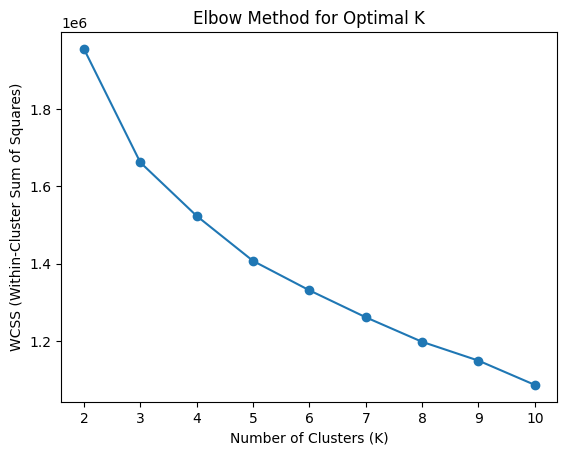

In [ ]:
def compute_wcss_range(X, k_range, n_init=5, verbose=True):
    """
    Computes WCSS for a range of cluster counts using the lowest WCSS out of multiple initializations.

    Parameters:
    - X: ndarray of shape (n_samples, n_features)
    - k_range: iterable of K values to evaluate (e.g., range(2, 11))
    - n_init: number of times to run KMeans per K
    - verbose: whether to print status

    Returns:
    - wcss_values: list of lowest WCSS per K
    """

    # Your code here
    wcss_values = []
    
    for k in k_range:
        wcss = np.inf  
        for _ in range(n_init):
            current_centroids, current_labels, current_wcss = kmeans(X, k)
            if current_wcss < wcss:
                wcss = current_wcss
        wcss_values.append(wcss)
        if verbose:
            print(f"WCSS for K={k}: {wcss}")
    
    return wcss_values

k_range = range(2, 11)

X = df_standardized.to_numpy()

wcss_values = compute_wcss_range(X, k_range)
# Plot the curve here

plt.plot(k_range, wcss_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


# **Step 6: Validate K with the Silhouette Score** 

Once you’ve used the Elbow Method to narrow down a possible K, it’s helpful to **validate** your choice using another metric: the **Silhouette Score**.

---

## What’s the Silhouette Score?

The **Silhouette Score** measures how well each point fits within its assigned cluster **compared to** other clusters.

It answers the question:
> “Is this point really in the right cluster, or would it fit better somewhere else?”

Here’s how it works:

For each data point:
- `a(i)` = average distance to other points in the **same cluster**
- `b(i)` = average distance to points in the **nearest other cluster**
- Silhouette score for that point =  
  **(b - a) / max(a, b)**

So:
- A score near **+1** → well-clustered
- A score near **0** → ambiguous or on a boundary
- A score **< 0** → possibly misclassified

---

## Why Use the Silhouette Score?

Unlike WCSS (which only measures **how compact** your clusters are), the Silhouette Score measures **how well-separated** and **internally consistent** they are.

It captures two ideas:
- **Cohesion**: Are the points close to others in their own cluster?
- **Separation**: Are they far from other clusters?

This makes it ideal for validating your K.

---

## What You Need to Do

1. Run your `kmeans()` function for each value of **K** from 2 to 10.
2. For each K, run K-Means **5 times** with different random initializations.
3. For each run, compute the **average silhouette score** using `compute_average_silhouette()`.
4. For each K, keep the **highest silhouette score** among the 5 runs.
5. Use `evaluate_silhouette_over_k()` to automate this process.
6. Plot the results using `plot_silhouette_scores()`.

---

## A little explanation of the functions

### `compute_average_silhouette(X, labels)`
- Computes the silhouette score **from scratch**.
- Input: dataset `X`, assigned cluster labels `labels`
- Output: average silhouette score (float)

### `evaluate_silhouette_over_k(X, k_range, n_init=5, sample_size=1000)`
- Tries multiple K values and multiple initializations.
- Uses `compute_average_silhouette()` internally.
- Returns a dictionary mapping each K to its best silhouette score.

### `plot_silhouette_scores(scores)`
- Takes the output of the previous function and draws a line plot.
- Helps you visually identify the **best K** (the one with the peak score).

---

## What You’re Looking For

- A clear **peak** in silhouette score across different values of K.
- The best K is typically the one with the **highest average silhouette score** — not too small (underfitting) and not too large (overfitting).



Evaluating K = 2
Evaluating K = 3
Evaluating K = 4
Evaluating K = 5
Evaluating K = 6
Evaluating K = 7
Evaluating K = 8
Evaluating K = 9
Evaluating K = 10


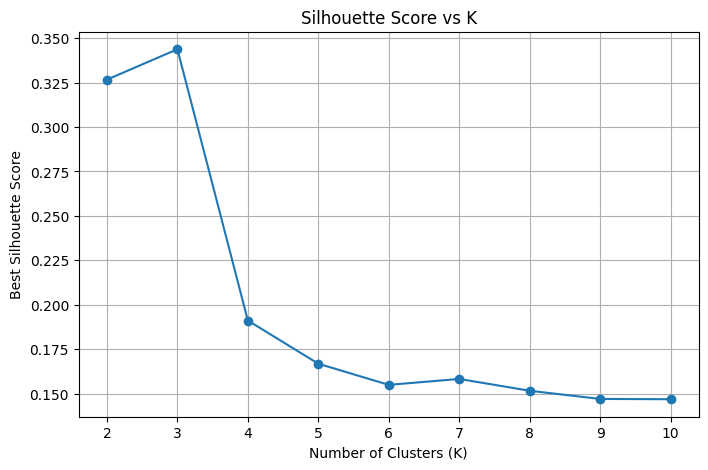

Silhouette Score for K=2: 0.3267
Silhouette Score for K=3: 0.3438
Silhouette Score for K=4: 0.1911
Silhouette Score for K=5: 0.1668
Silhouette Score for K=6: 0.1549
Silhouette Score for K=7: 0.1583
Silhouette Score for K=8: 0.1516
Silhouette Score for K=9: 0.1470
Silhouette Score for K=10: 0.1468

 Best K based on silhouette score: 3


In [44]:
def compute_average_silhouette(X, labels):
    """
    Computes the average silhouette score from scratch.

    Parameters:
    - X: ndarray of shape (n_samples, n_features)
    - labels: ndarray of shape (n_samples,) with cluster labels

    Returns:
    - mean silhouette score (float)
    """

    # Your code here
    n_samples = X.shape[0]
    unique_labels = np.unique(labels)
    silhouette_scores = []

    for i in range(n_samples):
        own_cluster = X[labels == labels[i]]
        other_clusters = [X[labels == label] for label in unique_labels if label != labels[i]]

        if len(own_cluster) > 1:
            a = np.mean([np.linalg.norm(X[i] - x) for x in own_cluster if not np.array_equal(x, X[i])])
        else:
            a = 0  
        b = np.inf
        for cluster in other_clusters:
            if len(cluster) > 0:
                b_dist = np.mean([np.linalg.norm(X[i] - x) for x in cluster])
                b = min(b, b_dist)
        s = (b - a) / max(a, b) if max(a, b) != 0 else 0
        silhouette_scores.append(s)

    return np.mean(silhouette_scores)

def evaluate_silhouette_over_k(X, k_range, n_init=5, sample_size=1000, random_state=None, verbose=True):
    """
    Evaluates silhouette scores for different values of K using custom KMeans and silhouette.

    Parameters:
    - X: ndarray (n_samples, n_features)
    - k_range: iterable of K values to evaluate
    - n_init: number of KMeans initializations per K
    - sample_size: max number of points to use for silhouette score
    - random_state: RNG seed
    - verbose: print progress

    Returns:
    - silhouette_scores: dict {K: best silhouette score}
    """

    # Your code here
    if sample_size < len(X):
        np.random.seed(random_state)
        indices = np.random.choice(len(X), size=sample_size, replace=False)
        X_sampled = X[indices]
    else:
        X_sampled = X

    silhouette_scores = {}

    for K in k_range:
        if verbose:
            print(f"Evaluating K = {K}")
        best_score = -1

        for _ in range(n_init):
            
            centroids, labels, _ = kmeans(X_sampled, K)
            
            score = compute_average_silhouette(X_sampled, labels)
            best_score = max(best_score, score)

        silhouette_scores[K] = best_score

    return silhouette_scores

def plot_silhouette_scores(scores):
    """
    Plots silhouette scores over different values of K.

    Parameters:
    - scores: dict {K: silhouette score}
    """

    # Your code here
    ks = list(scores.keys())
    values = list(scores.values())

    plt.figure(figsize=(8, 5))
    plt.plot(ks, values, marker='o', linestyle='-')
    plt.title("Silhouette Score vs K")
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Best Silhouette Score")
    plt.grid(True)
    plt.show()

k_range = range(2, 11)
X = df_standardized.to_numpy()

silhouette_scores = evaluate_silhouette_over_k(X, k_range, n_init=5, sample_size=1000, random_state=42)

plot_silhouette_scores(silhouette_scores)

for k, score in silhouette_scores.items():
    print(f"Silhouette Score for K={k}: {score:.4f}")

best_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"\n Best K based on silhouette score: {best_k}")


# **Step 7 : Train Final K‑Means Model** 

Choose the best K based on the elbow and silhouette plots.  
Then, train a final K-Means model using that K.
We fit the final model and attach the resulting cluster labels to `df`.

In [ ]:
# Step 7: Train Final K-Means Model
best_k = 3  # Replace with the value you selected

centroids, labels, _ = kmeans(X, best_k)
df['cluster_label'] = labels

print(df.head())


   genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#

# **Step 8: Visualize Clusters via PCA**

After training your final K-Means model, it’s important to **see what the clusters look like**.

But there’s a challenge: your dataset might have **many features** (dimensions), which humans can’t directly visualize.

---

## Why PCA?

We use **Principal Component Analysis (PCA)** to solve this.

PCA is a dimensionality reduction technique that transforms your data into a new coordinate system where:
- The **first axis (PC1)** captures the most variation in the data
- The **second axis (PC2)** captures the next most variation (orthogonal to the first)

This lets us compress the data into just **2 dimensions**, while keeping as much structure as possible.

---

## Why Visualize Clusters?

Once we project the data using PCA, we can:
- Plot each data point in this 2D space
- Color the points based on their **cluster labels**

This helps you:
- See how well-separated the clusters are
- Spot overlaps or outliers
- Get an intuitive sense of whether the clusters **make sense visually**

Even though PCA simplifies the data, **it often reveals structure** that's useful for understanding your clustering results.

---

## What You Need to Do

1. Use `PCA(n_components=2)` from `sklearn.decomposition` on your **standardized dataset**.
2. Transform the data and plot it in 2D using `matplotlib` or `seaborn`.
3. Use different colors for each cluster using the labels from your final K-Means model.

---



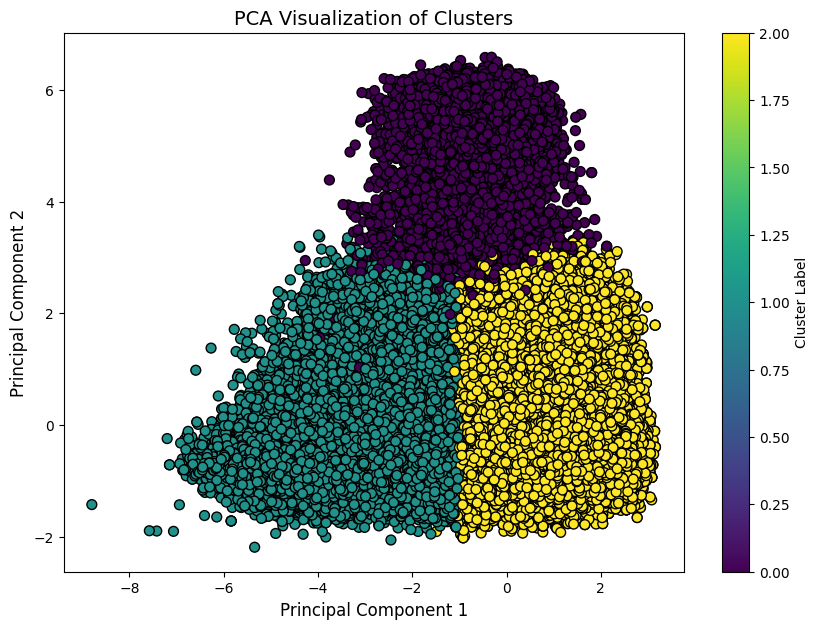

In [ ]:
# Your code here
# You can use the PCA class from sklearn.decomposition to reduce the dimensionality of the data
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  

plt.figure(figsize=(10, 7))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster_label'], cmap='viridis', edgecolor='k', s=50)

plt.title('PCA Visualization of Clusters', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)

plt.colorbar(label='Cluster Label')

plt.show()


---

Now that you've visualized your clusters in 2D using PCA, take a moment to **analyze what you're seeing**:

- Are the clusters **visually separated**, or do they **overlap**?
- Does the shape and size of each cluster **look balanced**, or is one dominating the space?
- Can you spot any **outliers** or points that look like they could belong to more than one cluster?

> ✍️ **Your Task**:  
Write a short explanation (3–4 lines) interpreting the PCA plot above. Focus on:
- Whether the clusters are well-separated
- Whether this visualization supports your earlier decision for **K = 3**

Remember: PCA reduces dimensionality, so this is an approximation — but it’s still a **great sanity check** to confirm your clustering results.


 **Your Answer**
 The PCA plot indicates that the clusters are nicely separated into three groups overall, which is in favor of the selection of K = 3 for clustering. Each cluster is found in a different area in the 2D space, but there is some minor overlap at the edges. The shape and size of the clusters appear reasonably balanced, and there are few outliers scattered around the edges.
-


🎉 **Well done!**  
You have successfully completed PA5 Part 1


<h1><b> Denoising Autoencoders and Latent Space Visualization 


In [25]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
!pip install torchsummary
from torchsummary import summary
!pip install scikit-learn
from sklearn.manifold import TSNE


if torch.backends.mps.is_available():
    device = torch.device('mps') # Apple Silicon GPU
elif torch.cuda.is_available():
    device = torch.device('cuda') # NVIDIA GPU
else:
    device = torch.device('cpu')


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [24]:
!pip install torch torchvision torchaudio

  Using cached torch-2.7.0-cp311-cp311-win_amd64.whl.metadata (29 kB)
  Using cached torchvision-0.22.0-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
  Using cached torchaudio-2.7.0-cp311-cp311-win_amd64.whl.metadata (6.7 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached fsspec-2025.3.2-py3-none-any.whl.metadata (11 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ---------------------------------------- 0.0/212.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/212.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/212.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/212.5 MB 279.3 kB/s eta 0:12:41
   ---------------------------------------- 0.1/212.5 MB 326.1 kB/s eta 0:10:52
   ---------------------------------------- 0.1/212.5 MB 326.1 kB/s eta 0:10:52
  


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



   --- ----------------------------------- 17.0/212.5 MB 282.1 kB/s eta 0:11:34
   --- ----------------------------------- 17.0/212.5 MB 282.1 kB/s eta 0:11:34
   --- ----------------------------------- 17.0/212.5 MB 281.9 kB/s eta 0:11:34
   --- ----------------------------------- 17.0/212.5 MB 281.6 kB/s eta 0:11:35
   --- ----------------------------------- 17.0/212.5 MB 281.8 kB/s eta 0:11:34
   --- ----------------------------------- 17.1/212.5 MB 281.3 kB/s eta 0:11:35
   --- ----------------------------------- 17.1/212.5 MB 281.6 kB/s eta 0:11:35
   --- ----------------------------------- 17.1/212.5 MB 281.2 kB/s eta 0:11:35
   --- ----------------------------------- 17.1/212.5 MB 281.1 kB/s eta 0:11:36
   --- ----------------------------------- 17.1/212.5 MB 281.1 kB/s eta 0:11:36
   --- ----------------------------------- 17.1/212.5 MB 281.2 kB/s eta 0:11:35
   --- ----------------------------------- 17.2/212.5 MB 281.2 kB/s eta 0:11:35
   --- --------------------------------


   --------------------------------- ---- 188.5/212.5 MB 343.9 kB/s eta 0:01:10
   --------------------------------- ---- 188.5/212.5 MB 343.9 kB/s eta 0:01:10
   --------------------------------- ---- 188.5/212.5 MB 343.9 kB/s eta 0:01:10
   --------------------------------- ---- 188.5/212.5 MB 343.9 kB/s eta 0:01:10
   --------------------------------- ---- 188.5/212.5 MB 343.9 kB/s eta 0:01:10
   --------------------------------- ---- 188.5/212.5 MB 343.9 kB/s eta 0:01:10
   --------------------------------- ---- 188.5/212.5 MB 343.9 kB/s eta 0:01:10
   --------------------------------- ---- 188.5/212.5 MB 338.9 kB/s eta 0:01:11
   --------------------------------- ---- 188.5/212.5 MB 338.9 kB/s eta 0:01:11
   --------------------------------- ---- 188.5/212.5 MB 338.9 kB/s eta 0:01:11
   --------------------------------- ---- 188.5/212.5 MB 338.9 kB/s eta 0:01:11
   --------------------------------- ---- 188.5/212.5 MB 338.9 kB/s eta 0:01:11
   --------------------------------- --

<hr>

**<h1><b><span style="color: #007BFF;"> Visualization Functions</span></b></h1>**

<hr>

Only use the following helper visualization functions  provided below

In [26]:
# =========== Visualization Functions ==========

def displayImg(img, title=""):
    """
    Displays a tensor as an image. Handles both single images and grids of images.

    Args:
        img (torch.Tensor): The image tensor to display. Expected shape for a single image
                           is (C, H, W) or for a grid (C, H, W_total) created by
                           torchvision.utils.make_grid.
        title (str, optional): The title to display above the image. Defaults to "".

    Returns:
        None. Displays the image using matplotlib.
    """
    img = img.cpu()
    npimg = img.numpy()
    plt.figure(figsize=(8, 8))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.axis('off')
    plt.show()

def plot_comparison(original, noisy, reconstructed, n=5, title_prefix=""):
    """
    Displays a comparison grid of original, noisy, and reconstructed images.

    Args:
        original (torch.Tensor): A batch of original (clean) image tensors.
                                 Shape: (batch_size, C, H, W).
        noisy (torch.Tensor): A batch of corresponding noisy image tensors.
                              Shape: (batch_size, C, H, W).
        reconstructed (torch.Tensor): A batch of corresponding reconstructed image tensors
                                      output by the autoencoder. Shape: (batch_size, C, H, W).
        n (int, optional): The number of image triplets (original, noisy, reconstructed)
                           to display. Defaults to 5.
        title_prefix (str, optional): A string to prepend to the main title of the plot.
                                     Defaults to "".

    Returns:
        None. Displays the comparison plot using matplotlib.
    """
    original = original.cpu()
    noisy = noisy.cpu()
    reconstructed = reconstructed.cpu()

    plt.figure(figsize=(15, 5))
    for i in range(n):
        # --- Display original image ---
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(original[i].squeeze(), cmap='gray')
        ax.set_title("Original")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # --- Display noisy input image ---
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(noisy[i].squeeze(), cmap='gray')
        ax.set_title("Noisy Input")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # --- Display reconstructed image ---
        ax = plt.subplot(3, n, i + 1 + 2 * n)
        plt.imshow(reconstructed[i].squeeze(), cmap='gray')
        ax.set_title("Reconstructed")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.suptitle(f"{title_prefix} - Image Denoising Comparison", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

<hr>

## <h1><b> Introduction to Denoising Autoencoders <span style="color: #007BFF;"></span></b></h1>

<hr>

### <h2><b> The Challenge of Noise in Data </b></h2>
<p>Imagine taking a photo in low light. The resulting image might appear grainy or have artifacts – this is noise. Noise is common in real-world data and can significantly degrade its quality. For machine learning models, noisy data can lead to poor performance in tasks like image classification, object detection, or medical image analysis, as the noise can obscure the underlying patterns the model needs to learn.</p>

### <h2><b> Autoencoders: Learning to Reconstruct </b></h2>
<p>An Autoencoder is a type of artificial neural network used for unsupervised learning, primarily aimed at learning efficient representations (encodings) of data. It consists of two parts:</p>
<ol>
    <li><b>Encoder:</b>     Compresses the input data into a lower-dimensional latent space (also called the bottleneck). This forces the encoder to capture the most salient features of the data.</li>
    <li><b>Decoder:</b>     Attempts to reconstruct the original input data from the compressed latent representation generated by the encoder.</li>
</ol>
<p>The autoencoder is trained by minimizing the difference between the original input and the reconstructed output (reconstruction error). Essentially, it tries to learn an identity function, but the bottleneck forces it to learn a useful, compressed representation along the way.</p>

### <h2><b> Denoising Autoencoders (DAEs): Learning Robust Representations </b></h2>
<p>A Denoising Autoencoder (DAE) is a specific type of autoencoder designed to tackle the problem of noise. Instead of learning to reconstruct the original input from itself, a DAE is trained to reconstruct the *original, clean* input from a *corrupted (noisy)* version of it.</p>
<ul>
    <li><b>Training Process:</b>
        <ol>
            <li>Take a clean data sample.</li>
            <li>Artificially add noise to create a corrupted version.</li>
            <li>Feed the <i>noisy</i> version into the DAE's encoder.</li>
            <li>The decoder generates a reconstruction.</li>
            <li>Calculate the reconstruction error between the decoder's output and the <i>original clean</i> data sample.</li>
            <li>Update the DAE's weights to minimize this error.</li>
        </ol>
    </li>
    <li><b>Why it Works:</b> By forcing the network to recover the underlying clean structure from noisy input, the DAE learns features that are robust to noise and capture the essential characteristics of the data distribution. It learns to separate the signal (the digit) from the noise.</li>
</ul>

<hr>

<h2><b> Linear vs. Convolutional Denoising Autoencoders </b></h2>
<p>In this assignment, we will implement and compare two architectures for DAEs:</p>
<ul>
    <li><b>Linear DAE:</b>  This architecture uses only fully connected (dense or `Linear`) layers. To process images, the input image is typically flattened into a long vector.
    <li><b>Convolutional DAE (CDAE):</b>    This architecture leverages convolutional layers (`Conv2d`) in the encoder and corresponding transposed convolutional layers (`ConvTranspose2d`, sometimes called deconvolutional layers) in the decoder.
</ul>

<hr>

<h2><b> MNIST Dataset for Denoising </b></h2>
<p>We will apply these DAEs to the <b>MNIST dataset</b>. MNIST is a standard benchmark dataset consisting of 70,000 images (60k training, 10k testing) of handwritten digits (0 through 9). Each image is a 28x28 pixel grayscale image. We will create noisy versions of these images by adding Gaussian noise, which will serve as the input to our DAEs, while the original clean images will be the target output for training.</p>

<hr>

<hr>

## <h1><b><span style="color: #007BFF;"> Hyperparameters</span></b></h1>

<hr>
<p>Hyperparameters are configuration settings used to control the learning process. They are set before training begins. Tuning these can significantly impact model performance.</p>

In [27]:
BATCH_SIZE = 256
EPOCHS = 15   #dont change this
LEARNING_RATE = 0.001
NOISE_FACTOR = 0.5  #dont change this
LATENT_DIM = 64

<hr>

## <h1><b> Dataset Loading |<span style="color: #007BFF;"> MNIST (Clean & Noisy)</span></b></h1>

<hr>
<p>For training a Denoising Autoencoder, we require two parallel datasets:</p>
<ol>
    <li><b>Clean Dataset:</b> The original, noise-free MNIST images. These will serve as the <i>target</i> for our autoencoder's reconstruction during loss calculation.</li>
    <li><b>Noisy Dataset:</b> The MNIST images corrupted with artificial noise. These will serve as the <i>input</i> to our autoencoder during training and evaluation.</li>
</ol>
<p>We achieve this by defining two different transformation pipelines using `torchvision.transforms`.</p>

NOTE: Pre-written code is provided for you.

```python

In [28]:
# ============== Data Transformations ==================
transform_clean = transforms.Compose([
    transforms.ToTensor(),
])

# --- Custom Transformation to add Gaussian Noise ---
class AddGaussianNoise(object):
    """
    Adds Gaussian noise to a tensor image.

    Args:
        mean (float): Mean of the Gaussian distribution used for noise. Default: 0.0.
        std (float): Standard deviation of the Gaussian distribution used for noise. Default: 1.0.
        noise_factor (float): A multiplier applied to the standard deviation to control the
                              intensity of the added noise. Default: 0.5.
    """
    def __init__(self, mean=0., std=1., noise_factor=0.5):
        self.std = std
        self.mean = mean
        self.noise_factor = noise_factor

    def __call__(self, tensor):
        """
        Applies the noise transformation.

        Args:
            tensor (torch.Tensor): Input image tensor (expected range [0.0, 1.0]).

        Returns:
            torch.Tensor: Image tensor with added Gaussian noise, clipped to [0.0, 1.0].
        """
        noise = torch.randn(tensor.size()) * self.std * self.noise_factor + self.mean
        noisy_tensor = tensor + noise
        return torch.clamp(noisy_tensor, 0., 1.)

    def __repr__(self):
        """String representation of the transformation."""
        return self.__class__.__name__ + f'(mean={self.mean}, std={self.std}, noise_factor={self.noise_factor})'

transform_noisy = transforms.Compose([
    transforms.ToTensor(),
    AddGaussianNoise(mean=0., std=1., noise_factor=NOISE_FACTOR)
])


# ================ Load Clean Data ======================

trainset_clean = torchvision.datasets.MNIST(root='./data',train=True,download=True,transform=transform_clean)
# DataLoader wraps the dataset, providing batching, shuffling, etc.
# shuffle=False is important here to ensure clean batches align with noisy batches.
trainloader_clean = torch.utils.data.DataLoader(trainset_clean,batch_size=BATCH_SIZE,shuffle=False)

testset_clean = torchvision.datasets.MNIST( root='./data',train=False,download=True,transform=transform_clean)
testloader_clean = torch.utils.data.DataLoader(testset_clean,batch_size=BATCH_SIZE,shuffle=False)

# ================ Load Noisy Data =====================

trainset_noisy = torchvision.datasets.MNIST(root='./data',train=True,download=True, transform=transform_noisy)
trainloader_noisy = torch.utils.data.DataLoader(trainset_noisy,batch_size=BATCH_SIZE,shuffle=False)

testset_noisy = torchvision.datasets.MNIST(root='./data',train=False,download=True,transform=transform_noisy)
testloader_noisy = torch.utils.data.DataLoader(testset_noisy,batch_size=BATCH_SIZE,shuffle=False)

100.0%
100.0%
100.0%
100.0%


<hr>

## <h1><b> Data Visualisation |<span style="color: #007BFF;"> Clean vs. Noisy MNIST</span></b></h1>

<hr>
<p>Before building the models, let's visualize some corresponding samples from the clean and noisy datasets. This helps confirm that the noise transformation is working as expected and gives an idea of the challenge the Denoising Autoencoder will face.</p>

Clean Images:


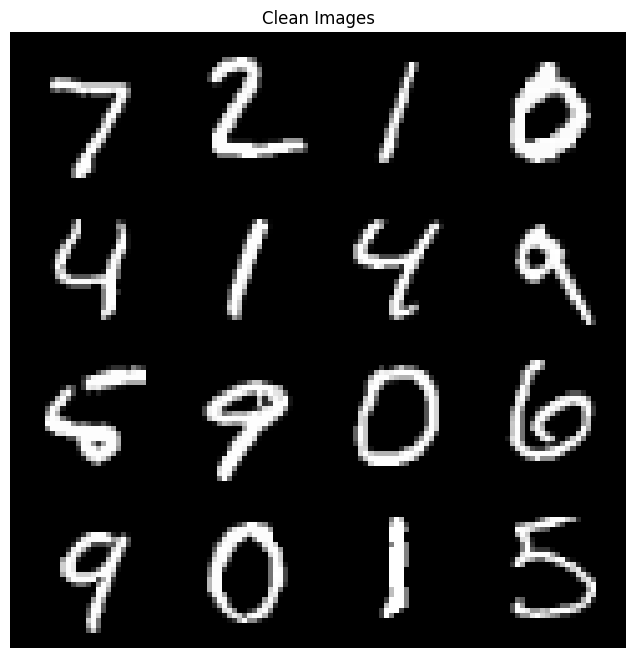

Noisy Images:


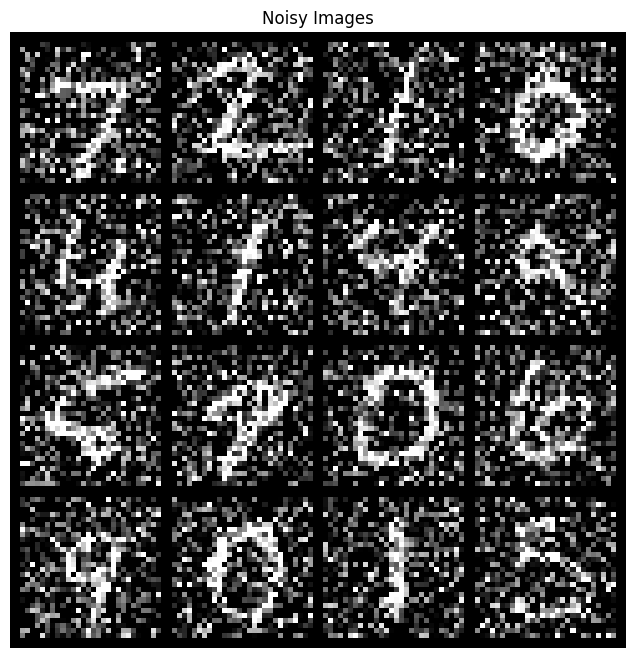

In [29]:
# --- Display the images ---
# Use displayImg to visualize the first 16 images from each batch
def displayImg(img_tensor_batch, nrow=4, title=""):
    """
    Displays a grid of images from a batch tensor [B, 1, H, W].
    Args:
        img_tensor_batch: A batch of image tensors.
        nrow: Number of images per row in the grid.
        title: Optional title for the plot.
    """
    img_grid = torchvision.utils.make_grid(img_tensor_batch[:16], nrow=nrow, padding=2)
    np_img = img_grid.numpy()

    plt.figure(figsize=(8, 8))
    plt.imshow(np.transpose(np_img, (1, 2, 0)), cmap='gray')
    plt.axis('off')
    plt.title(title)
    plt.show()

clean_images, _ = next(iter(testloader_clean))
noisy_images, _ = next(iter(testloader_noisy))


print("Clean Images:")
displayImg(clean_images, title="Clean Images")


print("Noisy Images:")
displayImg(noisy_images, title="Noisy Images")


<hr>

## <h1 style="text-align: left;"><b>Task 1: Linear Denoising Autoencoder | <span style="color: #007BFF;">MNIST</span></b></h1>

<hr>
<p>Our first model is a Denoising Autoencoder constructed using only <strong>Linear (fully connected) layers</strong>. This architecture requires flattening the 2D input image into a 1D vector before feeding it into the encoder. The decoder then reconstructs the flattened vector, which represents the denoised image.

<strong>🚨 Important: When implementing the model, ensure that both the encoder and the decoder sections utilize a maximum of 3 `nn.Linear` layers each.🚨</strong></p>


### <h2 style="text-align: left;"> Model Definition | <span style="color: #007BFF;">Linear DAE</span></h2>
<p>We define the `LinearDenoisingAutoencoder` class. It contains an `encoder` sequence (Linear layers reducing dimensionality) and a `decoder` sequence (Linear layers increasing dimensionality back to the original). ReLU activations are used in hidden layers, and a Sigmoid activation is crucial for the final decoder layer to ensure the output pixel values are in the [0, 1] range.</p>

In [30]:
class LinearDenoisingAutoencoder(nn.Module):
    def __init__(self):
        """
        Initializes the layers of the Linear Denoising Autoencoder.
        Defines the encoder and decoder sequential blocks.
        """
        super(LinearDenoisingAutoencoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 64),  
            nn.ReLU()
        )

        self.decoder = nn.Sequential(
            nn.Linear(64, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 28*28),
            nn.Sigmoid()  
        )

    def forward(self, x):
        """
        Defines the forward pass of the autoencoder.
        Args:
            x (torch.Tensor): Input tensor representing a batch of images.
                              Expected shape: (batch_size, 1, 28, 28).

        Returns:
            torch.Tensor: Output tensor representing the reconstructed flattened images.
                          Shape: (batch_size, 784).
        """
        x = x.view(x.size(0), -1)  
        encoded = self.encoder(x)
        reconstruction = self.decoder(encoded)
        return reconstruction


### <h2 style="text-align: left;"> Trainer Class | <span style="color: #007BFF;">Linear DAE</span></h2>
<p>This `LinearDAETrainer` class encapsulates the logic for training, evaluating, and visualizing the `LinearDenoisingAutoencoder`. It handles:</p>
<ul>
    <li>Initialization of the model, optimizer, and loss function.</li>
    <li>The training loop (`train_epoch`), which processes batches of noisy input and calculates loss against clean targets.</li>
    <li>The evaluation loop (`evaluate`), which measures the reconstruction MSE on the test set without updating model weights.</li>
    <li>A main `train` method orchestrating the epochs and printing progress.</li>
    <li>Utility methods for plotting loss curves (`plot_loss`) and visualizing the denoising results (`visualize_denoising`).</li>
</ul>
<p>Crucially, the loss is always computed by comparing the model's output (reconstruction from noisy input) with the corresponding original clean image.</p>

In [31]:
class LinearDAETrainer:
    def __init__(self, model, learning_rate=0.001, device=None):
        """
        Initializes the Trainer.

        Args:
            model (nn.Module): The LinearDenoisingAutoencoder model instance to train.
            learning_rate (float, optional): The learning rate for the Adam optimizer.
                                             Defaults to 0.001.
            device (torch.device, optional): The device (e.g., 'cuda', 'mps', 'cpu') to
                                             run the training on.
        """
        self.device = device or torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model = model.to(self.device)
        self.lr = learning_rate
        self.criterion = nn.MSELoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.lr)
        self.train_losses = []
        self.test_losses = []
        # Print a summary of the model architecture
        summary(self.model, input_size=(1, 28, 28), device=str(self.device))
  


    def train_epoch(self, noisy_loader, clean_loader):
        """
        Performs a single epoch of training.

        Iterates through the dataset, performs forward and backward passes,
        and updates model weights. Calculates loss against clean targets.

        Args:
            noisy_loader (DataLoader): DataLoader providing batches of noisy images (input).
            clean_loader (DataLoader): DataLoader providing corresponding batches of clean
                                       images (target).

        Returns:
            float: The average training loss for this epoch.
        """
        self.model.train()
        total_loss = 0

        for (noisy_imgs, _), (clean_imgs, _) in zip(noisy_loader, clean_loader):
            noisy_imgs = noisy_imgs.to(self.device)
            clean_imgs = clean_imgs.to(self.device)

            self.optimizer.zero_grad()
            outputs = self.model(noisy_imgs)
            loss = self.criterion(outputs, clean_imgs.view(clean_imgs.size(0), -1))
            loss.backward()
            self.optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss / len(noisy_loader)
        self.train_losses.append(avg_loss)
        return avg_loss

    def evaluate(self, noisy_loader, clean_loader):
        """
        Evaluates the model's performance on the test dataset.

        Calculates the reconstruction loss  between the model's output
        (from noisy input) and the clean target images without updating weights.

        Args:
            noisy_loader (DataLoader): DataLoader for the noisy test images (input).
            clean_loader (DataLoader): DataLoader for the clean test images (target).

        Returns:
            float: The average test loss for this epoch.
        """
        self.model.eval()
        total_loss = 0

        with torch.no_grad():
            for (noisy_imgs, _), (clean_imgs, _) in zip(noisy_loader, clean_loader):
                noisy_imgs = noisy_imgs.to(self.device)
                clean_imgs = clean_imgs.to(self.device)

                outputs = self.model(noisy_imgs)
                loss = self.criterion(outputs, clean_imgs.view(clean_imgs.size(0), -1))
                total_loss += loss.item()

        avg_loss = total_loss / len(noisy_loader)
        self.test_losses.append(avg_loss)
        return avg_loss

    def train(self, train_noisy_loader, train_clean_loader, test_noisy_loader, test_clean_loader, num_epochs):
        """
        Runs the complete training loop for a specified number of epochs.

        Calls train_epoch and evaluate for each epoch and prints the progress.

        Args:
            train_noisy_loader (DataLoader): DataLoader for noisy training data.
            train_clean_loader (DataLoader): DataLoader for clean training data.
            test_noisy_loader (DataLoader): DataLoader for noisy test data.
            test_clean_loader (DataLoader): DataLoader for clean test data.
            num_epochs (int): The total number of epochs to train for.

        Returns:
            None. Prints training progress.
        """
        for epoch in range(1, num_epochs + 1):
            train_loss = self.train_epoch(train_noisy_loader, train_clean_loader)
            test_loss = self.evaluate(test_noisy_loader, test_clean_loader)
            print(f"Epoch {epoch}/{num_epochs} => Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")


    def plot_loss(self):
        """
        Generates and displays a plot of training and test loss curves over epochs.
        """
        plt.figure(figsize=(8, 5))
        plt.plot(self.train_losses, label='Train Loss')
        plt.plot(self.test_losses, label='Test Loss')
        plt.xlabel('Epochs')
        plt.ylabel('MSE Loss')
        plt.title('Training and Test Loss Over Epochs')
        plt.legend()
        plt.grid(True)
        plt.show()


    def visualize_denoising(self, noisy_loader, clean_loader, num_images=5):
        """
        Visualizes the denoising results by comparing original, noisy,
        and reconstructed images side-by-side.

        Args:
            noisy_loader (DataLoader): DataLoader for noisy test images.
            clean_loader (DataLoader): DataLoader for clean test images.
            num_images (int, optional): The number of image triplets to display.
                                        Defaults to 5.

        Returns:
            None. Displays the comparison plot.
        """
        # Use the dedicated plotting function plot_comparison
        self.model.eval()
        noisy_batch, _ = next(iter(noisy_loader))
        clean_batch, _ = next(iter(clean_loader))

        noisy_batch = noisy_batch.to(self.device)
        outputs = self.model(noisy_batch)

        fig, axes = plt.subplots(num_images, 3, figsize=(10, 2 * num_images))
        for i in range(num_images):
            
            axes[i, 0].imshow(clean_batch[i].squeeze().cpu(), cmap='gray')
            axes[i, 0].set_title('Clean')
            axes[i, 0].axis('off')

            axes[i, 1].imshow(noisy_batch[i].squeeze().cpu(), cmap='gray')
            axes[i, 1].set_title('Noisy')
            axes[i, 1].axis('off')

            reconstructed = outputs[i].view(28, 28).detach().cpu()
            axes[i, 2].imshow(reconstructed, cmap='gray')
            axes[i, 2].set_title('Reconstructed')
            axes[i, 2].axis('off')

        plt.tight_layout()
        plt.show()

### <h2 style="text-align: left;">Model Training & Evaluation | <span style="color: #007BFF;">Linear DAE</span></h2>

- Instantiate the `LinearDenoisingAutoencoder` model.  
- Create a `LinearDAETrainer` object to manage training.  
- Start the training process
- After training:
  - Plot the loss curves to visualize the training progress.
  - Display qualitative results:
    - Show denoised images compared them with their corresponding noisy inputs and clean originals.

In [32]:
# ================== Setup Linear DAE ==================

model = LinearDenoisingAutoencoder()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

trainer = LinearDAETrainer(model=model, learning_rate=0.001, device=device)

summary(model, input_size=(1, 28, 28), device=str(device))

# ===================== Train Model =====================

num_epochs = 10
trainer.train(trainloader_noisy, trainloader_clean, testloader_noisy, testloader_clean, num_epochs=num_epochs)








----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]         401,920
              ReLU-2                  [-1, 512]               0
            Linear-3                  [-1, 256]         131,328
              ReLU-4                  [-1, 256]               0
            Linear-5                   [-1, 64]          16,448
              ReLU-6                   [-1, 64]               0
            Linear-7                  [-1, 256]          16,640
              ReLU-8                  [-1, 256]               0
            Linear-9                  [-1, 512]         131,584
             ReLU-10                  [-1, 512]               0
           Linear-11                  [-1, 784]         402,192
          Sigmoid-12                  [-1, 784]               0
Total params: 1,100,112
Trainable params: 1,100,112
Non-trainable params: 0
---------------------------

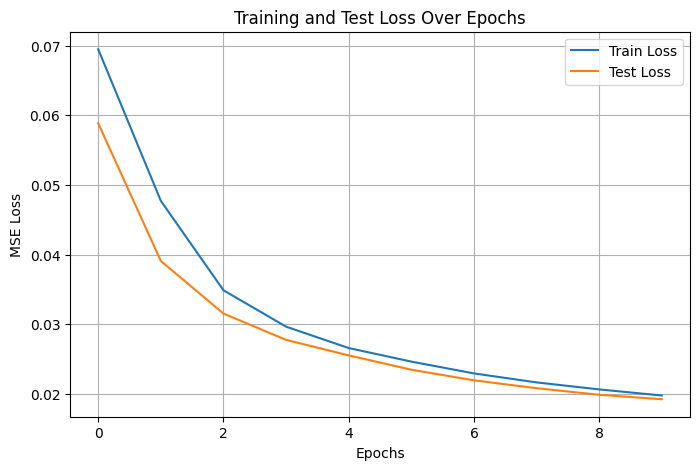

In [33]:
# ===================== Plot Loss =====================

trainer.plot_loss()

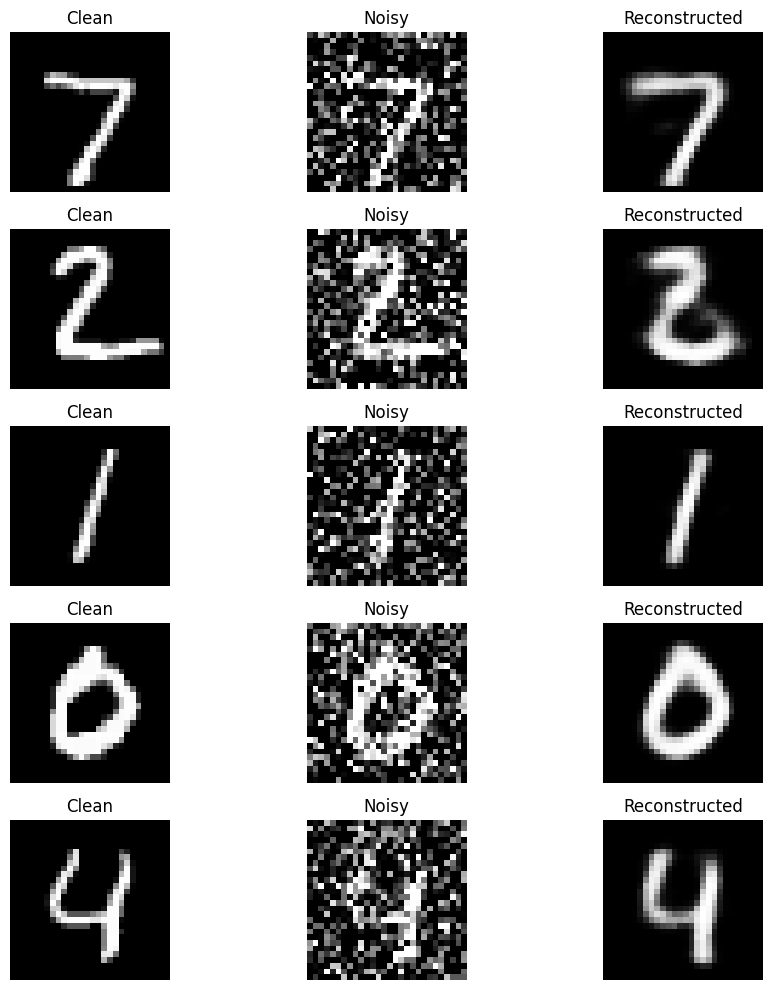

In [34]:
# ================= Visualize Results =================
trainer.visualize_denoising(testloader_noisy, testloader_clean, num_images=5)


<hr>

## <h1 style="text-align: left;"><b>Task 2: Convolutional Denoising Autoencoder | <span style="color: #007BFF;">MNIST</span></b></h1>

<hr>
<p>Next, we implement a more sophisticated Denoising Autoencoder using <strong>Convolutional layers</strong> (`Conv2d`) in the encoder and <strong>Transposed Convolutional layers</strong> (`ConvTranspose2d`) in the decoder. This architecture is inherently better suited for image data as it preserves and utilizes the spatial structure (pixel neighborhoods) through learnable filters.


<strong>🚨 Important: When implementing the model, ensure that both the encoder and the decoder sections utilize maximum 3 relevant convolutional (`nn.Conv2d`) or transposed convolutional (`nn.ConvTranspose2d`) layers each. 🚨</strong></p>



<p>The encoder will progressively reduce the spatial dimensions (height, width) while increasing the number of channels (features), and the decoder will reverse this process to reconstruct the clean image.</p>

<p>We explicitly separate the `encoder` and `decoder` components within the model definition. This allows us to easily extract the output of the encoder (the latent space representation) later for Task 3 (t-SNE visualization).</p>


In [35]:
LATENT_DIM = 64
class ConvDenoisingAutoencoder(nn.Module):
    def __init__(self, latent_dim=LATENT_DIM):
        """
        Initializes the layers of the Convolutional Denoising Autoencoder.

        Args:
            latent_dim (int, optional): The desired dimensionality of the latent space
                                       (bottleneck). Defaults to LATENT_DIM hyperparameter.
        """
        super(ConvDenoisingAutoencoder, self).__init__()
        self.latent_dim = latent_dim

        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),  
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),  
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),  
            nn.ReLU()
        )

        self.fc_enc = nn.Linear(64 * 7 * 7, latent_dim)
        self.fc_dec = nn.Linear(latent_dim, 64 * 7 * 7)

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=1, padding=1),        
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1),  
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1),   
            nn.Sigmoid()  
        )

    def forward(self, x):
        """
        Defines the forward pass of the convolutional autoencoder.

        Args:
            x (torch.Tensor): Input tensor representing a batch of images.
                              Expected shape: (batch_size, 1, 28, 28).

        Returns:
            tuple[torch.Tensor, torch.Tensor]: A tuple containing:
                - latent (torch.Tensor): The latent space representation. Shape: (batch_size, latent_dim).
                - reconstruction (torch.Tensor): The reconstructed image. Shape: (batch_size, 1, 28, 28).
        """
 
        batch_size = x.size(0)

       
        x_enc = self.encoder(x)                
        x_flat = x_enc.view(batch_size, -1)    
        latent = self.fc_enc(x_flat)        

        x_unflat = self.fc_dec(latent).view(batch_size, 64, 7, 7)
        reconstruction = self.decoder(x_unflat)

        return latent, reconstruction

### <h2 style="text-align: left;"> Trainer Class | <span style="color: #007BFF;">Conv DAE</span></h2>
<p>The `ConvDAETrainer` class mirrors the structure of the `LinearDAETrainer` but is adapted for the `ConvDenoisingAutoencoder`. Key differences include:</p>
<ul>
    <li>Handling image-shaped inputs and outputs directly (no flattening needed for loss calculation).</li>
    <li>The `model.forward()` call returns both the latent vector and the reconstruction; only the reconstruction is used for calculating the denoising loss.</li>
    <li>Includes a crucial `get_latent_features` method. This method takes a DataLoader (typically containing *clean* images), passes them through the *encoder part* of the trained model, and collects the resulting latent vectors along with their true labels. This data is essential for the t-SNE visualization in Task 3.</li>
</ul>

In [36]:
class ConvDAETrainer:
    """
    Manages the training, evaluation, visualization, and latent feature extraction
    for the ConvDenoisingAutoencoder model.
    """
    def __init__(self, model, learning_rate=0.001, device=None):
        """
        Initializes the Trainer.

        Args:
            model (nn.Module): The ConvDenoisingAutoencoder model instance.
            learning_rate (float, optional): Learning rate for the Adam optimizer. Defaults to 0.001.
            device (torch.device, optional): Device ('cuda', 'mps', 'cpu') for training.
                                             Auto-detects if None. Defaults to None.
        """
        self.device = device or torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model = model.to(self.device)
        self.lr = learning_rate
        self.criterion = nn.MSELoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.lr)
        self.train_losses = []
        self.test_losses = []
        # Display the model summary
        summary(self.model, input_size=(1, 28, 28), device=str(self.device))



    def train_epoch(self, noisy_loader, clean_loader):
        """
        Performs a single epoch of training for the Convolutional DAE.

        Args:
            noisy_loader (DataLoader): DataLoader for noisy input images.
            clean_loader (DataLoader): DataLoader for corresponding clean target images.

        Returns:
            float: Average training loss for the epoch.
        """
        self.model.train()
        running_loss = 0.0

        for (noisy_batch, _), (clean_batch, _) in zip(noisy_loader, clean_loader):
            noisy_batch = noisy_batch.to(self.device)
            clean_batch = clean_batch.to(self.device)

            self.optimizer.zero_grad()
            _, recon = self.model(noisy_batch)
            loss = self.criterion(recon, clean_batch)
            loss.backward()
            self.optimizer.step()

            running_loss += loss.item() * noisy_batch.size(0)

        avg_loss = running_loss / len(noisy_loader.dataset)
        return avg_loss

    def evaluate(self, noisy_loader, clean_loader):
        """
        Evaluates the Convolutional DAE on the test dataset.

        Args:
            noisy_loader (DataLoader): DataLoader for noisy test images (input).
            clean_loader (DataLoader): DataLoader for clean test images (target).

        Returns:
            float: Average test loss for the epoch.
        """
        self.model.eval()
        running_loss = 0.0

        with torch.no_grad():
            for (noisy_batch, _), (clean_batch, _) in zip(noisy_loader, clean_loader):
                noisy_batch = noisy_batch.to(self.device)
                clean_batch = clean_batch.to(self.device)

                _, recon = self.model(noisy_batch)
                loss = self.criterion(recon, clean_batch)
                running_loss += loss.item() * noisy_batch.size(0)

        avg_loss = running_loss / len(noisy_loader.dataset)
        return avg_loss
    
    def train(self, train_noisy_loader, train_clean_loader, test_noisy_loader, test_clean_loader, num_epochs):
        """
        Runs the full training and evaluation loop for the Conv DAE.

        Args:
            train_noisy_loader (DataLoader): DataLoader for noisy training data.
            train_clean_loader (DataLoader): DataLoader for clean training data.
            test_noisy_loader (DataLoader): DataLoader for noisy test data.
            test_clean_loader (DataLoader): DataLoader for clean test data.
            num_epochs (int): Total number of epochs to train.

        Returns:
            None. Prints training progress.
        """
        for epoch in range(1, num_epochs + 1):
            train_loss = self.train_epoch(train_noisy_loader, train_clean_loader)
            test_loss = self.evaluate(test_noisy_loader, test_clean_loader)

            self.train_losses.append(train_loss)
            self.test_losses.append(test_loss)

            print(f"Epoch {epoch}/{num_epochs} - Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")




    def plot_loss(self):
        """
        Generates and displays a plot of training and test loss curves over epochs.
        """
        plt.figure(figsize=(8, 5))
        plt.plot(self.train_losses, label="Train Loss")
        plt.plot(self.test_losses, label="Test Loss")
        plt.xlabel("Epoch")
        plt.ylabel("MSE Loss")
        plt.title("Training vs Test Loss")
        plt.legend()
        plt.grid(True)
        plt.show()

      

    def visualize_denoising(self, noisy_loader, clean_loader, num_images=5):
        """
        Visualizes the denoising performance by comparing original, noisy,
        and reconstructed images.

        Args:
            noisy_loader (DataLoader): DataLoader for noisy test images.
            clean_loader (DataLoader): DataLoader for clean test images.
            num_images (int, optional): Number of image triplets to display. Defaults to 5.

        Returns:
            None. Displays the comparison plot.
        """
        # Use the comparison plot_comparison function
        self.model.eval()
        noisy_images, _ = next(iter(noisy_loader))
        clean_images, _ = next(iter(clean_loader))

        noisy_images = noisy_images[:num_images].to(self.device)
        clean_images = clean_images[:num_images].to(self.device)

        with torch.no_grad():
            _, recon_images = self.model(noisy_images)

        recon_images = recon_images.cpu()
        noisy_images = noisy_images.cpu()
        clean_images = clean_images.cpu()

        fig, axes = plt.subplots(num_images, 3, figsize=(9, 3 * num_images))
        for i in range(num_images):
            axes[i, 0].imshow(clean_images[i][0], cmap='gray')
            axes[i, 0].set_title("Clean")
            axes[i, 1].imshow(noisy_images[i][0], cmap='gray')
            axes[i, 1].set_title("Noisy")
            axes[i, 2].imshow(recon_images[i][0], cmap='gray')
            axes[i, 2].set_title("Reconstructed")
            for j in range(3):
                axes[i, j].axis('off')
        plt.tight_layout()
        plt.show()


    def get_latent_features(self, dataloader):
        """
        Extracts the latent space representations for all items in a given dataloader.
        This is typically used with the *clean* dataset after training to get latent
        vectors corresponding to the original digits for visualization (e.g., t-SNE).

        Args:
            dataloader (DataLoader): The DataLoader containing the data (usually clean images)
                                     for which to extract latent features.

        Returns:
            tuple[np.ndarray, np.ndarray]: A tuple containing:
                - latent_features (np.ndarray): A NumPy array of the extracted latent vectors.
                                                Shape: (num_samples, latent_dim).
                - all_labels (np.ndarray): A NumPy array of the corresponding true labels.
                                           Shape: (num_samples,).
        """
        self.model.eval()
        latent_features = []
        all_labels = []

        with torch.no_grad():
            for images, labels in dataloader:
                images = images.to(self.device)
                latents, _ = self.model(images)
                latent_features.append(latents.cpu().numpy())
                all_labels.append(labels.numpy())

        latent_features = np.concatenate(latent_features, axis=0)
        all_labels = np.concatenate(all_labels, axis=0)
        return latent_features, all_labels

### <h2 style="text-align: left;"> Model Training & Evaluation | <span style="color: #007BFF;">Conv DAE</span></h2>
<p>Similar to Task 1, we now instantiate the `ConvDenoisingAutoencoder` and its `ConvDAETrainer`. We execute the training loop, plot the resulting loss curves, and visualize the denoising performance on sample test images. We expect the convolutional model to generally achieve lower reconstruction error and produce visually clearer reconstructions compared to the linear model.</p>

In [37]:
# ================== Setup Conv DAE ==================
conv_dae_model = ConvDenoisingAutoencoder()
conv_dae_trainer = ConvDAETrainer(model=conv_dae_model, learning_rate=0.001)


# ===================== Train Model =====================

num_epochs = 10  

conv_dae_trainer.train(
    train_noisy_loader=trainloader_noisy,
    train_clean_loader=trainloader_clean,
    test_noisy_loader=testloader_noisy,
    test_clean_loader=testloader_clean,
    num_epochs=num_epochs
)





----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 14, 14]             160
              ReLU-2           [-1, 16, 14, 14]               0
            Conv2d-3             [-1, 32, 7, 7]           4,640
              ReLU-4             [-1, 32, 7, 7]               0
            Conv2d-5             [-1, 64, 7, 7]          18,496
              ReLU-6             [-1, 64, 7, 7]               0
            Linear-7                   [-1, 64]         200,768
            Linear-8                 [-1, 3136]         203,840
   ConvTranspose2d-9             [-1, 32, 7, 7]          18,464
             ReLU-10             [-1, 32, 7, 7]               0
  ConvTranspose2d-11           [-1, 16, 14, 14]           4,624
             ReLU-12           [-1, 16, 14, 14]               0
  ConvTranspose2d-13            [-1, 1, 28, 28]             145
          Sigmoid-14            [-1, 1,

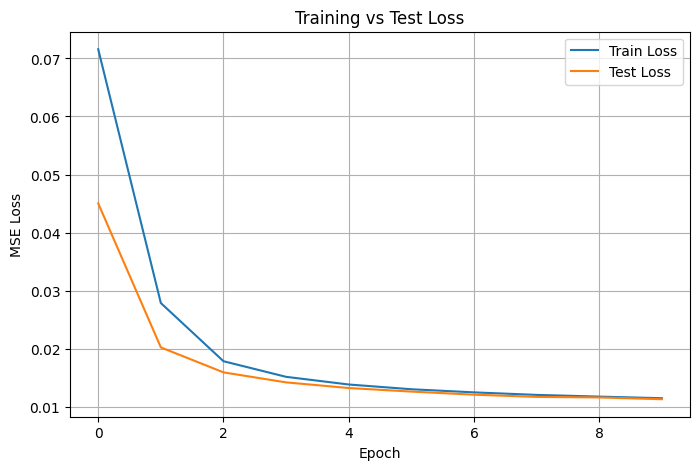

In [38]:
# ===================== Plot Loss =====================
conv_dae_trainer.plot_loss()

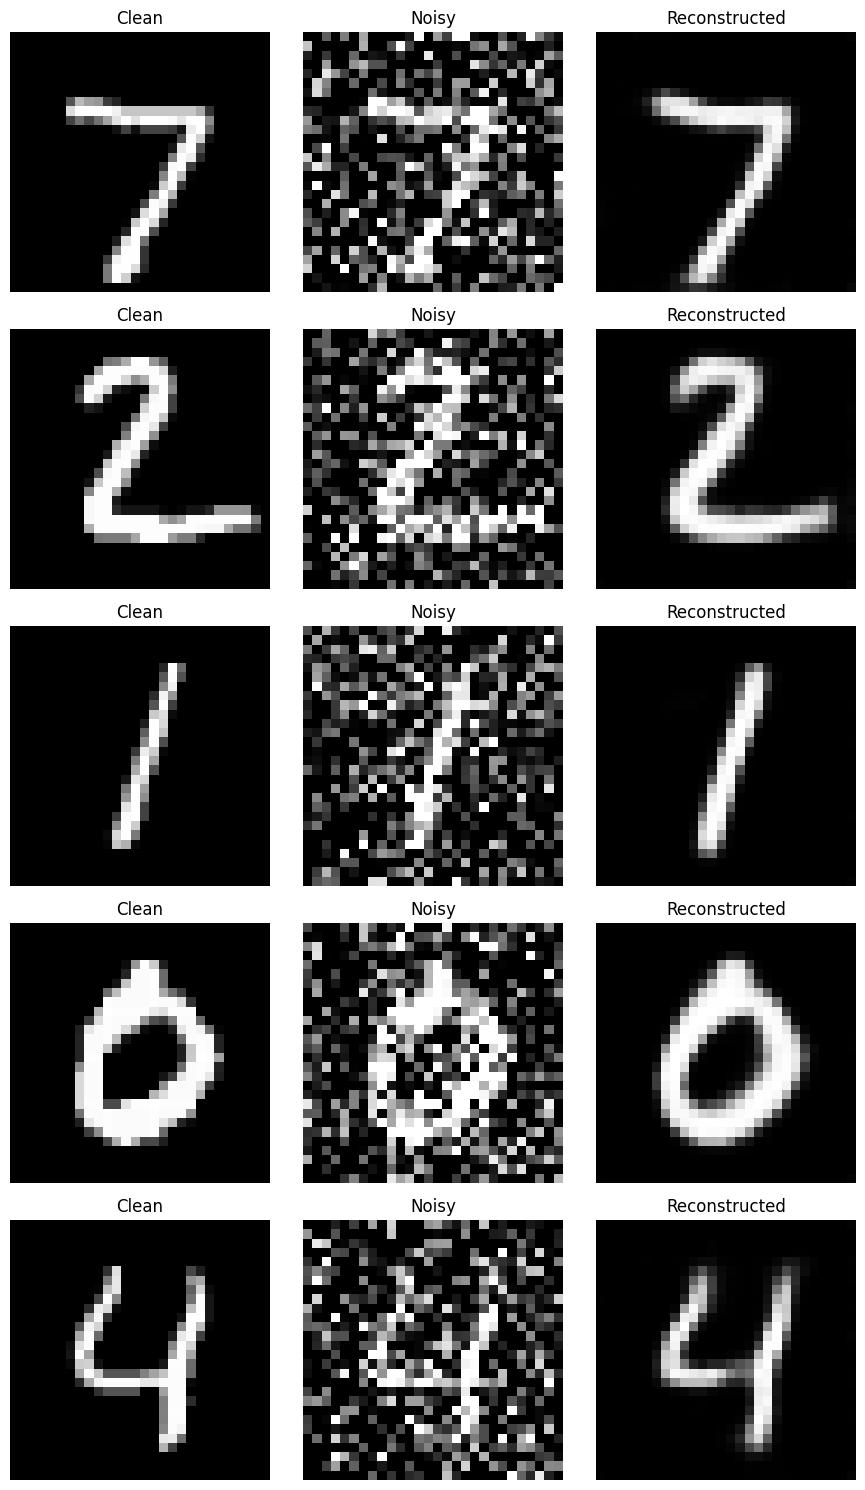

In [39]:
# ================= Visualize Results =================
conv_dae_trainer.visualize_denoising(noisy_loader=testloader_noisy, clean_loader=testloader_clean)


<hr>

## <h1 style="text-align: left;"><b>Task 3: t-SNE Visualization of Latent Space | <span style="color: #007BFF;">Conv DAE</span></b></h1>

<hr>

### <h2><b> Diving Deeper: Visualizing What the Autoencoder Learned </b></h2>
<p>After training the Convolutional Denoising Autoencoder (which usually learns richer representations than the linear one), we want to understand the structure of the information captured in its compressed latent space. The encoder maps each input image (784 dimensions or 1x28x28) to a point in a lower-dimensional space (e.g., 64 dimensions defined by `LATENT_DIM`). While we can't directly "see" in 64 dimensions, we can use dimensionality reduction techniques to project these points into a 2D or 3D space that we *can* visualize.</p>

### <h2><b> Introducing t-SNE: A Tool for High-Dimensional Data Visualization </b></h2>
<p><strong>t-Distributed Stochastic Neighbor Embedding (t-SNE)</strong> is a state-of-the-art technique specifically designed for visualizing high-dimensional datasets in low dimensions (typically 2D or 3D). It's not a clustering algorithm itself, but it's excellent at revealing underlying cluster structures present in the data.</p>

<h4><b>Core Idea: Preserving Neighborhoods</b></h4>
<p>t-SNE works by modeling the similarity between high-dimensional data points and then trying to find a low-dimensional embedding where similar points remain close together and dissimilar points are pushed apart. It focuses on preserving the *local* structure of the data.</p>

1.  **Modeling High-Dimensional Similarities:**
    For every pair of high-dimensional points (our latent vectors), t-SNE computes a conditional probability
    $p_{j|i}$ that point $i$ would pick point $j$ as its neighbor if neighbors were picked in proportion to their probability density under a Gaussian centered at $i$.
    It then creates a joint probability:
    $$p_{ij} = \frac{p_{j|i} + p_{i|j}}{2n}$$
    representing the similarity between $i$ and $j$.

2.  **Modeling Low-Dimensional Similarities:**
    It defines a similar joint probability $q_{ij}$ for the corresponding points in the low-dimensional map (e.g., 2D).
    Crucially, it uses a heavy-tailed Student's t-distribution (with one degree of freedom) instead of a Gaussian here.
    This allows moderately dissimilar points in the high-dimensional space to be modeled further apart in the low-dimensional map, helping to prevent crowding and better separating clusters.

3.  **Minimizing Divergence:**
    t-SNE uses gradient descent to adjust the positions of the points in the low-dimensional map to minimize the Kullback-Leibler (KL) divergence between the two distributions of joint probabilities ($P$ in high-D and $Q$ in low-D).
    This optimization process effectively tries to make the low-dimensional map reflect the neighborhood structure of the high-dimensional data.

DW we wont be doing this manually and will use the library!    

<h4><b>Key Parameters (in `sklearn.manifold.TSNE`):</b></h4>
<ul>
    <li><b>`n_components` (int, default=2):</b> The target dimensionality (usually 2 for plotting).</li>
    <li><b>`perplexity` (float):</b> This parameter loosely relates to the number of nearest neighbors considered for each point. It influences the balance between local and global aspects. Values between 5 and 50 are common. <strong>Tuning perplexity can significantly change the visualization.</strong> Lower values focus more on very local structure, while higher values consider broader neighborhoods.</li>
    <li><b>`learning_rate` (float or 'auto', default='auto'):</b> Controls the step size during optimization. The default 'auto' setting (usually around 200) often works well. If the plot looks like a tight ball, the learning rate might be too low; if points seem randomly scattered, it might be too high.</li>
    <li><b>`n_iter` (int):</b> The number of optimization iterations. t-SNE requires enough iterations to converge. 250 is the minimum recommended, 1000 or more is typical.</li>
    <li><b>`init` (str or np.ndarray, default='random'):</b> Initialization method for the low-dimensional points. Using `'pca'` (`init='pca'`) often provides a more stable and globally consistent starting point than random initialization, potentially leading to better results and faster convergence.</li>
    <li><b>`random_state` (int or None, default=None):</b> Seed for the random number generator. Setting this ensures reproducibility of the t-SNE plot.</li>
    <li><b>`verbose` (int, default=0):</b> If > 0, prints progress messages during optimization. Useful for long runs.</li>
</ul>

<h4><b>How to Interpret the Plot:</b></h4>
<ul>
    <li><b>Clusters:</b> Look for distinct groups of points. In our case, we will color the points based on the true digit label (0-9). If the autoencoder learned meaningful features, we expect points corresponding to the same digit to form tight, relatively well-separated clusters.</li>
    <li><b>Cluster Separation:</b> The visual separation between clusters suggests how distinct the learned representations are for different classes.</li>
    <li><b>Caveats:</b>
        <ul>
            <li><strong>Distances between clusters are not always meaningful:</strong> t-SNE might place clusters far apart even if they were relatively close in the original space, or vice-versa. Focus on the grouping *within* clusters and the relative separation.</li>
            <li><strong>Cluster sizes are not meaningful:</strong> The area occupied by a cluster in the t-SNE plot doesn't directly reflect the variance or number of points in the original space.</li>
            <li>t-SNE is computationally intensive, especially for large datasets.</li>
        </ul>
    </li>
</ul>

<p>In this task, we will apply t-SNE to the latent vectors extracted from the <strong>Convolutional Denoising Autoencoder</strong> (using the clean test images as input to the encoder) and visualize the resulting 2D embedding.</p>

### <h2 style="text-align: left;"> Extracting Latent Features | <span style="color: #007BFF;">Conv DAE</span></h2>
<p>First, we need the latent space representations. We use the `get_latent_features` method from our `ConvDAETrainer`. It's important to pass the <strong>clean test set DataLoader</strong> (`testloader_clean`) to this method. Why? Because we want to visualize how the autoencoder represents the <i>original, underlying structure</i> of the digits in its latent space, not how it represents the noisy inputs.</p>

<p>Since t-SNE can be slow on large datasets (like the full 10,000 MNIST test images), you could use a random subset of 5000 data points for faster visualization.</p>

In [41]:
import random
latent_features, true_labels = conv_dae_trainer.get_latent_features(testloader_clean)


subset_size = 5000
indices = random.sample(range(len(latent_features)), subset_size)
subset_latents = latent_features[indices]
subset_labels = true_labels[indices]


### <h2 style="text-align: left;"> Running t-SNE | <span style="color: #007BFF;">Conv DAE Latent Space</span></h2>
<p>Now we instantiate the `TSNE` object from `sklearn.manifold` with our chosen parameters (`n_components=2`, `perplexity`, `n_iter`, `init='pca'`, `random_state` for reproducibility, `verbose=1` to see progress). We then call the `fit_transform` method, passing in the extracted latent features. This performs the t-SNE optimization and returns the 2D coordinates for each latent vector.</p>
<p><i>Note: This step can take several minutes depending on the number of samples and the dimensionality of the latent space.</i></p>

In [42]:
# ===================== Run t-SNE Algorithm ======================
# Initialize the t-SNE transformer object
from sklearn.manifold import TSNE

tsne = TSNE(
    n_components=2,
    perplexity=30,
    n_iter=1000,
    init='pca',
    random_state=42,
    verbose=1
)

# Apply t-SNE to the (subset of) latent features.
# ===========================================================
tsne_results = tsne.fit_transform(subset_latents)

C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.000s...
[t-SNE] Computed neighbors for 5000 samples in 0.549s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 5.215087
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.086052
[t-SNE] KL divergence after 1000 iterations: 1.410300


### <h2 style="text-align: left;"> Plotting t-SNE Results | <span style="color: #007BFF;">Conv DAE Latent Space</span></h2>
<p>Finally, we create a scatter plot of the 2D points generated by t-SNE. Each point represents an image from our test set (or subset). We use the `true_labels` (the actual digit, 0-9) to color-code the points. This allows us to visually inspect whether the latent space learned by the Convolutional DAE has successfully grouped images of the same digit together.</p>



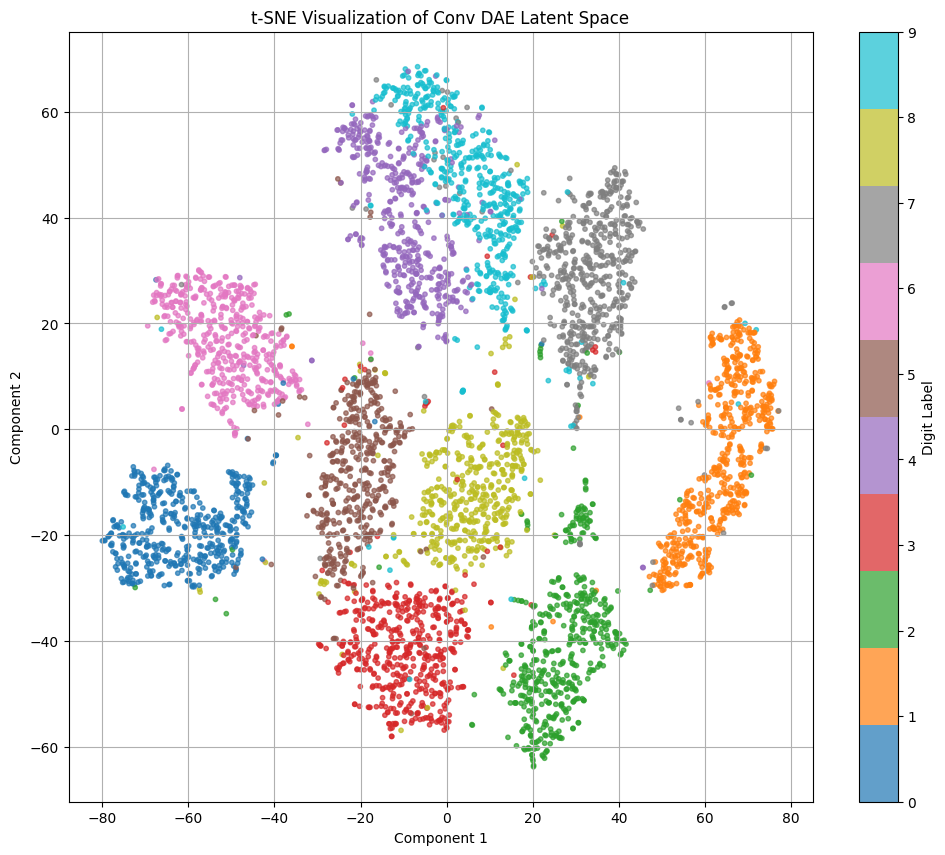

In [43]:
plt.figure(figsize=(12, 10)) # Create a reasonably large figure
# Create the scatter plot:

scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=subset_labels, cmap='tab10', s=10, alpha=0.7)
plt.colorbar(scatter, ticks=range(10), label='Digit Label')
plt.title("t-SNE Visualization of Conv DAE Latent Space")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()


<hr>

## <h1><b> Theory Questions | <span style="color: #007BFF;">Assignment 5</span></b></h1>

<hr>

**Instructions:** Answer the following questions based on the concepts and implementations covered in this assignment. PLEASE BE BRIEF. No gpt taqreer. Actually yk what negative marking if you violate this rule

1.  **Core Autoencoder Concepts:**
    * a) What is the "bottleneck" or "latent space" in an autoencoder, and why is it important for learning useful representations?

    **Answer:**
    It’s the compressed middle layer that forces the model to learn important features and ignore noise or irrelevant data.

2.  **Architectural Choices:**
    * a) What is the role of the `ConvTranspose2d` layers (Transposed Convolution) in the decoder of the Convolutional DAE?

     **Answer:**
     They upsample the feature maps to reconstruct the original image size from the compressed representation.
     

3.  **Comparison and Analysis:**
    * a) Based on the visual results and the final test loss values, which model (Linear DAE or Convolutional DAE) performed better at the denoising task? Provide a reason for this difference(if there is any).

     **Answer:**
     Conv DAE performed better. It captures spatial patterns (like edges) better than the linear one.

    * b) Can the encoder part of a trained DAE be used for other downstream tasks? If so, how and why might it be useful?

     **Answer:**
     Yes, it gives compressed features that can be used for classification, clustering, etc., instead of raw pixels.

    * c) Do you notice anything special about the clusters of digits '4' and '9' in the t-SNE plot? If so why might this be?

    **Answer:**
    They sometimes overlap because their shapes look similar, confusing the model.


Best of luck with your assignment! If you have any questions or need further assistance, feel free to ask. Happy coding!